In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
COLUMNS = ["ParticleID", "ParticleEnergy", "ParticlePositionfX",
           "ParticlePositionfY", "ParticlePositionfZ", "ParticleMomentumfX",
           "ParticleMomentumfY", "ParticleMomentumfZ"]

In [88]:
tsv1 = pd.read_csv("/scratch3/gccb/simulations/PhaseSpaceFiles/additional_energies/extracted_tsv_filtered/77_extracted/result73.tsv", sep='\t', header=None)
tsv1.columns = COLUMNS

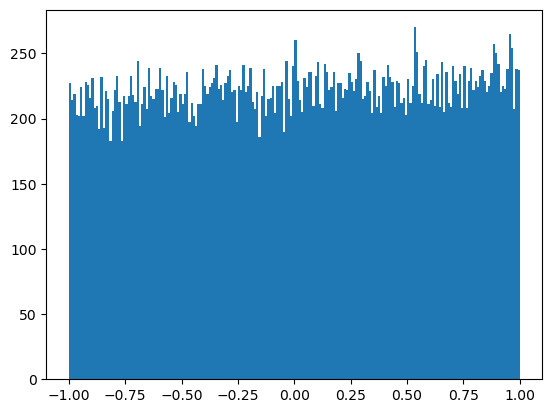

-0.999995 0.999968


In [89]:
fz = tsv1['ParticleMomentumfZ']
plt.hist(fz, bins=200)
plt.show()
print(fz.min(), fz.max())

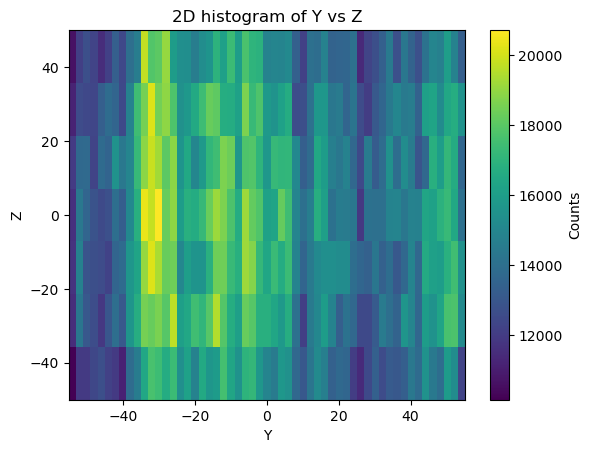

In [102]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
# Load ROOT file
file = uproot.open("/scratch3/gccb/simulations/PhaseSpaceFiles/additional_energies/sim_fixed_geo/combined/102dot9_extracted_combined.root")  # change this
tree = file["deposits"]

# Read the 'position' branch as an awkward array of TVector3 records
positions = tree.arrays("position", library="ak")["position"]


# Access the components by field names, e.g., fX, fZ (because TVector3 fields start with 'f')
x = ak.to_numpy(positions["fX"])
z = ak.to_numpy(positions["fZ"]) - 226
y = ak.to_numpy(positions["fY"])
# Now you can plot
plt.hist2d(x, y, bins=[55, 7], cmap="viridis")
plt.xlabel("Y")
plt.ylabel("Z")
plt.title("2D histogram of Y vs Z")
plt.colorbar(label="Counts")
plt.show()

Fitted params: I0=984680.34, mu=0.0501, beta=2.000


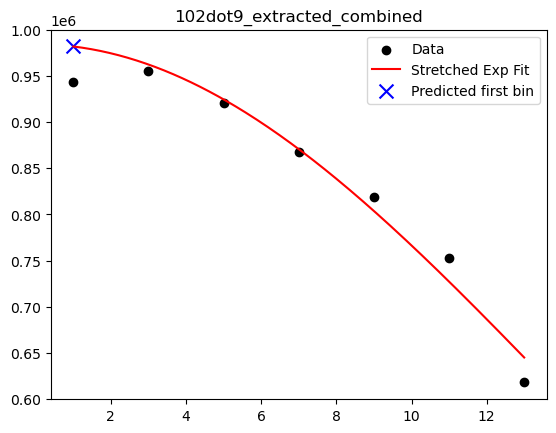

1.0060000000000042 982185.0760659883 0.0406476186331818 4.306708436576618e-08
Fitted params: I0=1054612.73, mu=0.0495, beta=2.000


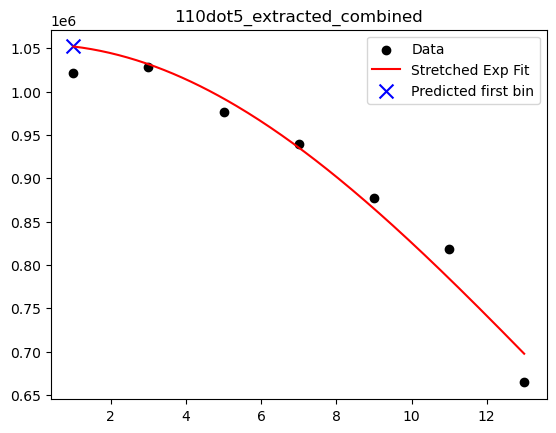

1.0060000000000042 1052003.1745556013 0.030418988013678788 2.97948747718332e-08
Fitted params: I0=1117091.11, mu=0.0501, beta=2.000


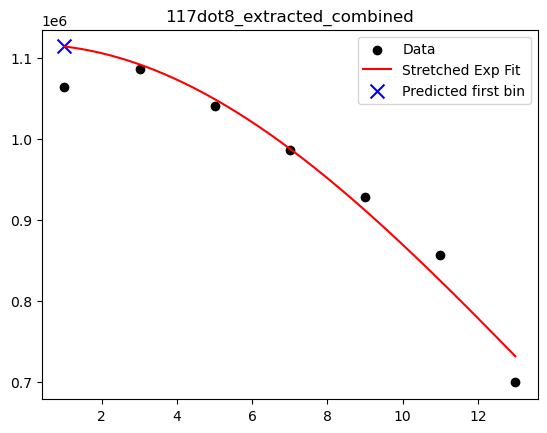

1.0060000000000042 1114262.1411979138 0.04660636588782699 4.377652028691964e-08
Fitted params: I0=82040.54, mu=0.0507, beta=2.000


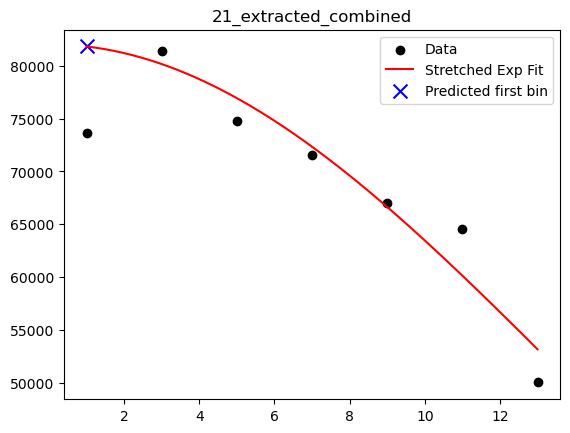

1.0060000000000042 81827.54710491389 0.11157588373018566 1.5156883708287236e-06
Fitted params: I0=351212.60, mu=0.0494, beta=2.000


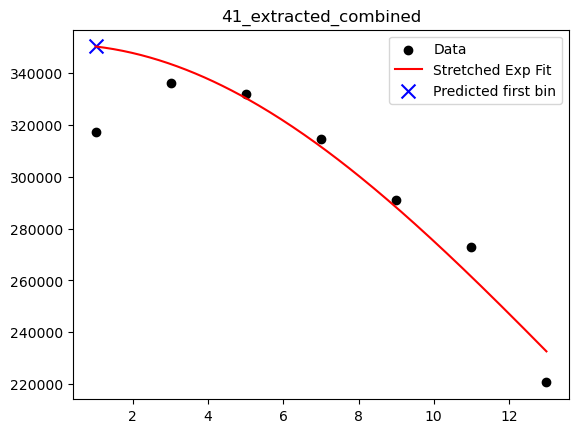

1.0060000000000042 350346.1962464161 0.1037272147917626 3.2678119844547964e-07
Fitted params: I0=509110.70, mu=0.0484, beta=2.000


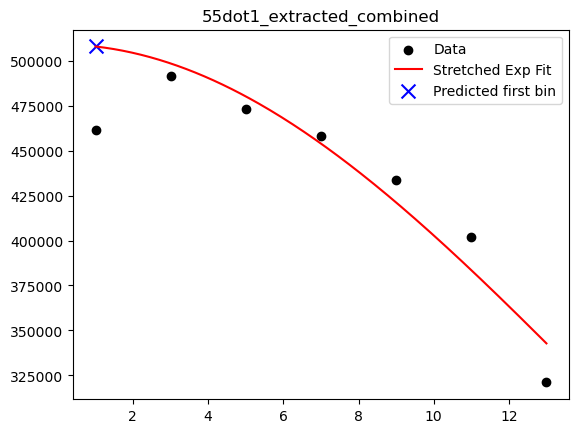

1.0060000000000042 507905.22636501066 0.10058165405169942 2.179507463936211e-07
Fitted params: I0=623175.71, mu=0.0471, beta=2.000


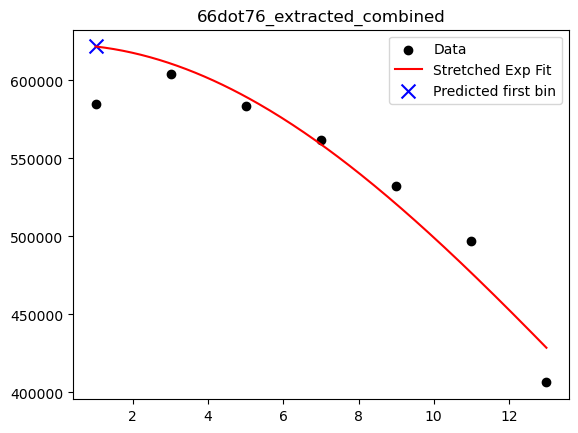

1.0060000000000042 621779.2547899697 0.06361960011147963 1.0882809792790757e-07
Fitted params: I0=743993.51, mu=0.0490, beta=2.000


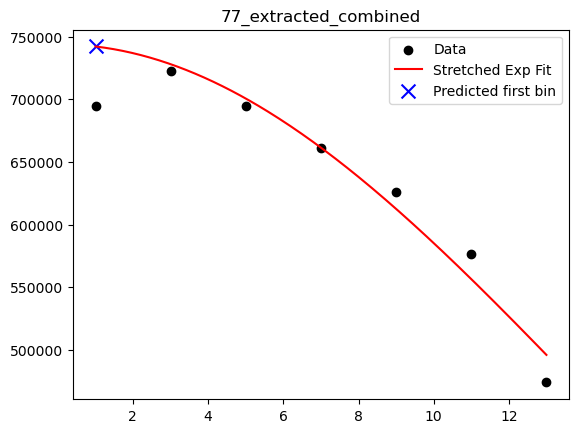

1.0060000000000042 742187.351456433 0.06843506786367352 9.851747841524788e-08
Fitted params: I0=812532.80, mu=0.0486, beta=2.000


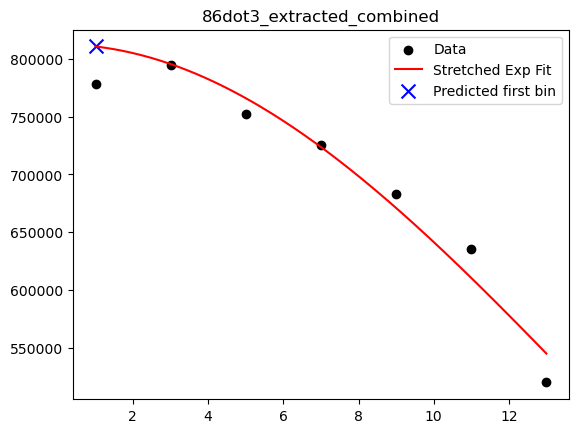

1.0060000000000042 810590.7069600404 0.04209798476565431 5.4121302786100457e-08
Fitted params: I0=908540.87, mu=0.0497, beta=2.000


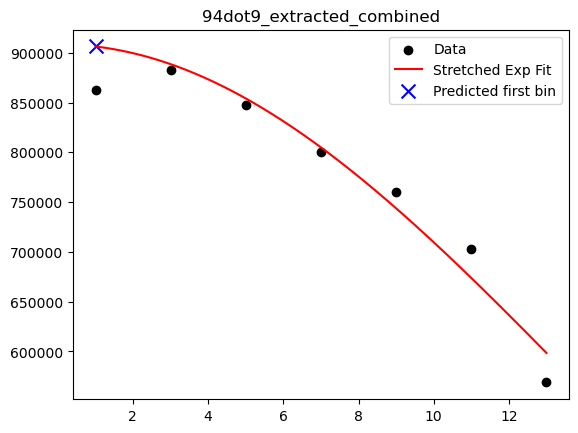

1.0060000000000042 906270.8802496699 0.05024716338360098 5.822976547272605e-08


In [115]:
dataPath = Path('/scratch3/gccb/simulations/PhaseSpaceFiles/additional_energies/sim_fixed_geo/combined')
mu_list = []
beta_list = []
err_list = []
for i, filePath in enumerate(sorted(dataPath.glob("*.root"))):
        rootFile = uproot.open(filePath)
        tree = rootFile["deposits"]

        # Read the 'position' branch as an awkward array of TVector3 records
        positions = tree.arrays("position", library="ak")["position"]


       

        z = ak.to_numpy(positions["fZ"]) - 226


        # Create histogram
        bins = 7
        counts, bin_edges = np.histogram(z, bins=bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Skip first bin if it's an outlier
        x = bin_centers[1:] 
        y = counts[1:]

        def stretched_exp(z, I0, mu, beta):
                return I0 * np.exp(-(mu * z)**beta)

        # Better initial guess
        p0 = [max(y), 0.05, 1.0]

        # Constrained fit
        popt, _ = curve_fit(stretched_exp, x, y, p0=p0,
                        bounds=([0, 0, 0], [np.inf, np.inf, 2]))

        print("Fitted params: I0=%.2f, mu=%.4f, beta=%.3f" % tuple(popt))
        mu_list.append(popt[1])
        beta_list.append(popt[2])
        # Plot
        x_fit = np.linspace(min(bin_centers), max(bin_centers), 200)
        plt.scatter(bin_centers, counts, label="Data", color="black")
        plt.plot(x_fit, stretched_exp(x_fit, *popt), 'r-', label="Stretched Exp Fit")
        plt.scatter(bin_centers[0], stretched_exp(bin_centers[0], *popt),
                color="blue", marker="x", s=100, label="Predicted first bin")
        plt.legend()
        plt.title(filePath.stem)
        plt.show()
        diff = np.abs(stretched_exp(bin_centers[0], *popt) - counts[0])/counts[0]
        err_list.append(diff)
        print(bin_centers[0], stretched_exp(bin_centers[0], *popt), diff, diff/counts[0])

In [117]:
print(err_list)
print(np.array(err_list).mean())

[np.float64(0.0406476186331818), np.float64(0.030418988013678788), np.float64(0.04660636588782699), np.float64(0.11157588373018566), np.float64(0.1037272147917626), np.float64(0.10058165405169942), np.float64(0.06361960011147963), np.float64(0.06843506786367352), np.float64(0.04209798476565431), np.float64(0.05024716338360098)]
0.06579575412327437


In [113]:
print(np.array(mu_list).mean())

0.04925193903659002


In [91]:
from scipy.signal import find_peaks

Bin centers: [ 1.006  3.004  5.002  7.     8.998 10.996 12.994]
Counts at each bin center: [943821 955551 920449 868126 818869 752752 617735]


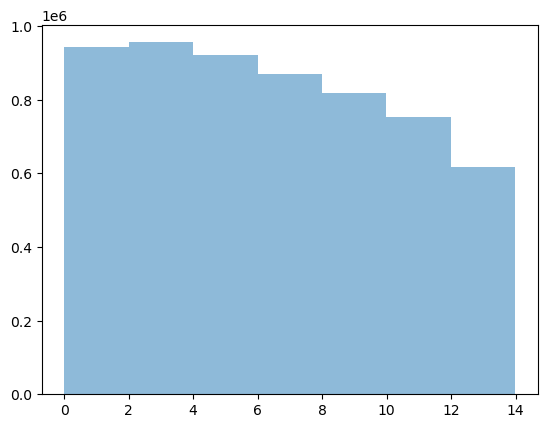

In [98]:
# Create histogram
bins = 7
counts, bin_edges = np.histogram(z, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Counts at each bin center
print("Bin centers:", bin_centers)
print("Counts at each bin center:", counts)

# Optional plot
plt.bar(bin_centers, counts, width=bin_edges[1]-bin_edges[0], alpha=0.5)
plt.show()

In [93]:
from scipy.optimize import curve_fit

Fitted params: I0=984680.34, mu=0.0501, beta=2.000


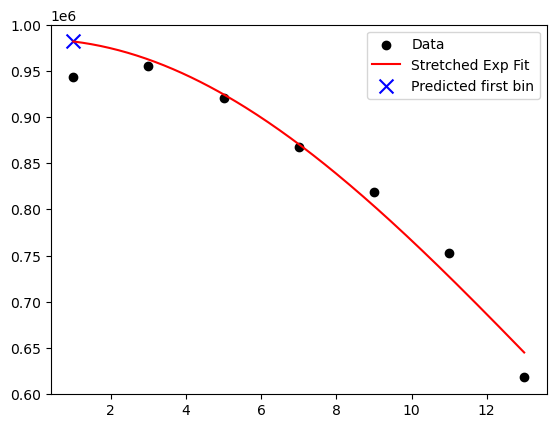

1.0060000000000042 982185.0760659883


In [99]:
# Skip first bin if it's an outlier
x = bin_centers[1:] 
y = counts[1:]

def stretched_exp(z, I0, mu, beta):
    return I0 * np.exp(-(mu * z)**beta)

# Better initial guess
p0 = [max(y), 0.05, 1.0]

# Constrained fit
popt, _ = curve_fit(stretched_exp, x, y, p0=p0,
                    bounds=([0, 0, 0], [np.inf, np.inf, 2]))

print("Fitted params: I0=%.2f, mu=%.4f, beta=%.3f" % tuple(popt))

# Plot
x_fit = np.linspace(min(bin_centers), max(bin_centers), 200)
plt.scatter(bin_centers, counts, label="Data", color="black")
plt.plot(x_fit, stretched_exp(x_fit, *popt), 'r-', label="Stretched Exp Fit")
plt.scatter(bin_centers[0], stretched_exp(bin_centers[0], *popt),
            color="blue", marker="x", s=100, label="Predicted first bin")
plt.legend()
plt.show()
print(bin_centers[0], stretched_exp(bin_centers[0], *popt))